In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("incendios-forestales.csv", sep = ";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FECHA DEL PARTE                    13977 non-null  object 
 1   HORA DEL PARTE                     16012 non-null  object 
 2   PROVINCIA                          16598 non-null  object 
 3   CAUSA PROBABLE                     12875 non-null  object 
 4   TÉRMINO MUNICIPAL                  16595 non-null  object 
 5   NIVEL                              12748 non-null  object 
 6   FECHA DE INICIO                    10171 non-null  object 
 7   HORA DE INICIO                     12872 non-null  object 
 8   MEDIOS DE EXTINCIÓN                11434 non-null  object 
 9   SITUACIÓN ACTUAL                   12714 non-null  object 
 10  TIPO Y HAS DE SUPERFICIE AFECTADA  12723 non-null  object 
 11  FECHA EXTINGUIDO                   5886 non-null   obj

In [22]:
df.head()

,FECHA DEL PARTE,HORA DEL PARTE,PROVINCIA,CAUSA PROBABLE,TÉRMINO MUNICIPAL,NIVEL,FECHA DE INICIO,HORA DE INICIO,MEDIOS DE EXTINCIÓN,SITUACIÓN ACTUAL,TIPO Y HAS DE SUPERFICIE AFECTADA,FECHA EXTINGUIDO,HORA EXTINGUIDO,CÓDIGO INE,NIVEL MÁXIMO ALCANZADO,Posición,TIPO
0,2019-07-01,10:00,BURGOS,RAYOS,CIGUENZA(VILLARCAYO DE MERINDAD DE CASTILLA LA...,0,2019-06-30,20:41,NaN,EXTINGUIDO,AGRICOLA: 0.01 HA.;,NaN,NaN,NaN,NaN,NaN,AGRICOLA
1,2019-07-01,10:00,SALAMANCA,POR DETERMINAR,SAN ESTEBAN DE LA SIERRA,0,2019-06-29,3:20,NaN,EXTINGUIDO,"FORESTAL:PASTO: 2,30 HA.;",NaN,NaN,NaN,NaN,NaN,FORESTAL
2,2019-07-01,10:00,SALAMANCA,DESCONOCIDO,ESPEJA,0,2019-06-30,17:03,NaN,EXTINGUIDO,"FORESTAL:PASTO: 1,72 HA.;",NaN,NaN,NaN,NaN,NaN,FORESTAL
3,2019-07-01,19:00,ÁVILA,POR DETERMINAR,ARENAL (EL),0,2019-06-29,16:04,1 TÉCNICOS; 2 A.M.; 1 BULLDOZER; 2 AUTOBOMBAS;...,ACTIVO,EN PERIMETRACIÓN,NaN,NaN,NaN,NaN,NaN,EN PERIMETRACIÓN
4,2019-07-01,19:00,SORIA,POR DETERMINAR,CANDILICHERA,0,2019-07-01,18:04,2 A.M.; HT-GARRAY; 1 AUTOBOMBAS; 1 CUADRILLAS ...,ACTIVO,"AGRICOLA: 8,98 HA. CEREAL DE SECANO",NaN,NaN,NaN,NaN,NaN,AGRICOLA


In [21]:
df['TIPO'] = df['TIPO Y HAS DE SUPERFICIE AFECTADA'].str.split(':').str[0]

In [11]:
## Ver valores nulos

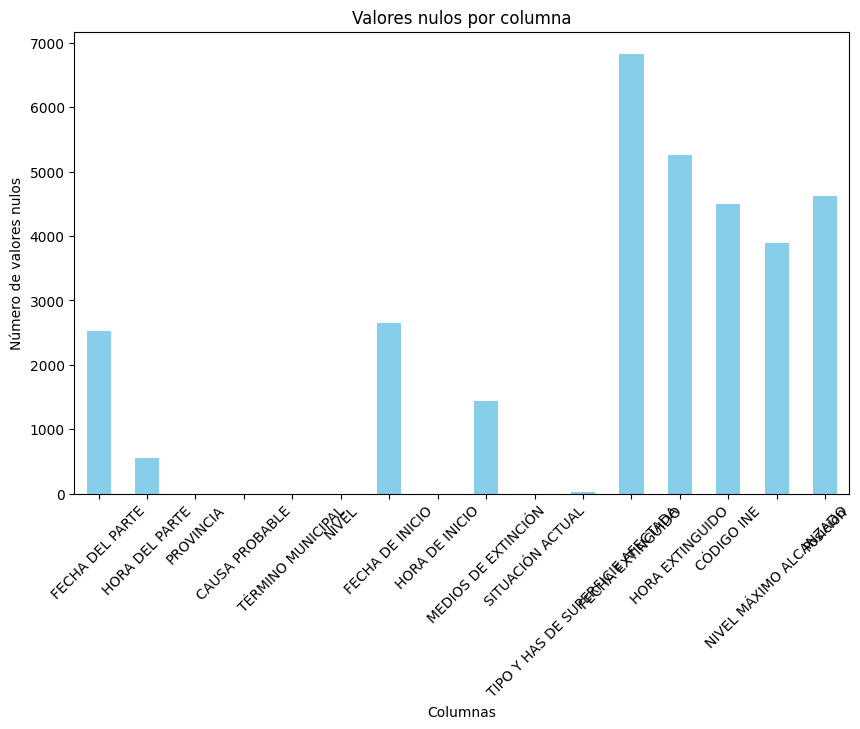

In [7]:
import matplotlib.pyplot as plt

# Contar los valores nulos en cada columna
valores_nulos = df.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según sea necesario
valores_nulos.plot(kind='bar', color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.title('Valores nulos por columna')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [14]:
## Borrar valores nulos de SITUACION ACTUAL que será nuestra variable objetivo

In [41]:
# Eliminar filas con valores nulos en la columna 'SITUACIÓN ACTUAL'
data_sin_nulos = df.dropna(subset=['SITUACIÓN ACTUAL'])

# Obtener los valores únicos en la columna 'SITUACIÓN ACTUAL'
valores_unicos = data_sin_nulos['SITUACIÓN ACTUAL'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'SITUACIÓN ACTUAL':")
print(valores_unicos)

Valores únicos en la columna 'SITUACIÓN ACTUAL':
['EXTINGUIDO' 'ACTIVO' 'CONTROLADO']


In [9]:
## En EXTINGUIDO HAY MUCHOS VALORES, toca normalizar eso

In [42]:
import pandas as pd

# Eliminar filas con valores nulos en la columna 'SITUACIÓN ACTUAL'
df = df.dropna(subset=['SITUACIÓN ACTUAL'])

# Reemplazar 'EXTINGUDO' con 'EXTINGUIDO'
df['SITUACIÓN ACTUAL'] = df['SITUACIÓN ACTUAL'].str.replace('EXTINGUDO', 'EXTINGUIDO')

# Reemplazar valores que contienen 'CONTROLADO' con 'CONTROLADO'
df['SITUACIÓN ACTUAL'] = df['SITUACIÓN ACTUAL'].str.replace('.*CONTROLADO.*', 'CONTROLADO', regex=True)

# Reemplazar valores que contienen 'EXTINGUIDO' con 'EXTINGUIDO'
df['SITUACIÓN ACTUAL'] = df['SITUACIÓN ACTUAL'].str.replace('.*EXTINGUIDO.*', 'EXTINGUIDO', regex=True)

# Eliminar fechas dentro de paréntesis en los valores de 'EXTINGUIDO'
df['SITUACIÓN ACTUAL'] = df['SITUACIÓN ACTUAL'].str.replace(r'\(.*\)', '', regex=True)

# Quitar espacios en blanco al principio y al final de los valores
df['SITUACIÓN ACTUAL'] = df['SITUACIÓN ACTUAL'].str.strip()

# Ver los valores únicos después de la limpieza
valores_unicos = df['SITUACIÓN ACTUAL'].unique()
print("Valores únicos después de la limpieza:")
print(valores_unicos)


Valores únicos después de la limpieza:
['EXTINGUIDO' 'ACTIVO' 'CONTROLADO']


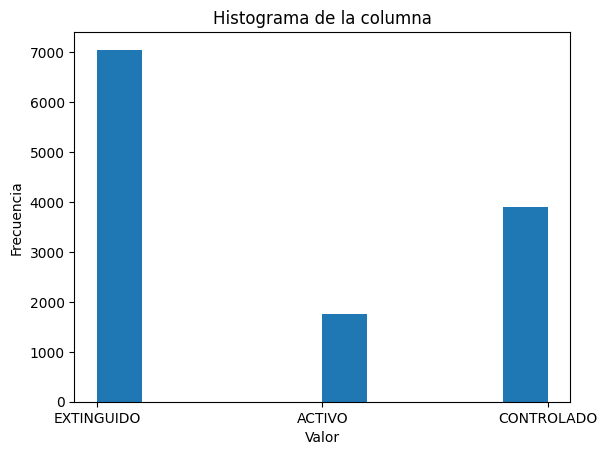

In [15]:
import matplotlib.pyplot as plt

# Histograma de una columna
plt.hist(df['SITUACIÓN ACTUAL'], bins=10)  # Reemplaza 'columna' con el nombre de tu columna
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna')
plt.show()

## Variables a tener en cuenta son:
1. FECHA DEL PARTE
2. HORA DEL PARTE
3. PROVINCIA
4. CAUSA PROBABLE
5. NIVEL
6. FECHA DE INICIO
7. HORA DE INICIO
8. TIPO

TARGET - SITUACIÓN ACTUAL

In [43]:
df_fin = df[["FECHA DEL PARTE", "HORA DEL PARTE", "PROVINCIA", "CAUSA PROBABLE", "NIVEL", "FECHA DE INICIO", "HORA DE INICIO", "TIPO", "SITUACIÓN ACTUAL"]]

In [44]:
df_fin.head()

,FECHA DEL PARTE,HORA DEL PARTE,PROVINCIA,CAUSA PROBABLE,NIVEL,FECHA DE INICIO,HORA DE INICIO,TIPO,SITUACIÓN ACTUAL
0,2019-07-01,10:00,BURGOS,RAYOS,0,2019-06-30,20:41,AGRICOLA,EXTINGUIDO
1,2019-07-01,10:00,SALAMANCA,POR DETERMINAR,0,2019-06-29,3:20,FORESTAL,EXTINGUIDO
2,2019-07-01,10:00,SALAMANCA,DESCONOCIDO,0,2019-06-30,17:03,FORESTAL,EXTINGUIDO
3,2019-07-01,19:00,ÁVILA,POR DETERMINAR,0,2019-06-29,16:04,EN PERIMETRACIÓN,ACTIVO
4,2019-07-01,19:00,SORIA,POR DETERMINAR,0,2019-07-01,18:04,AGRICOLA,ACTIVO


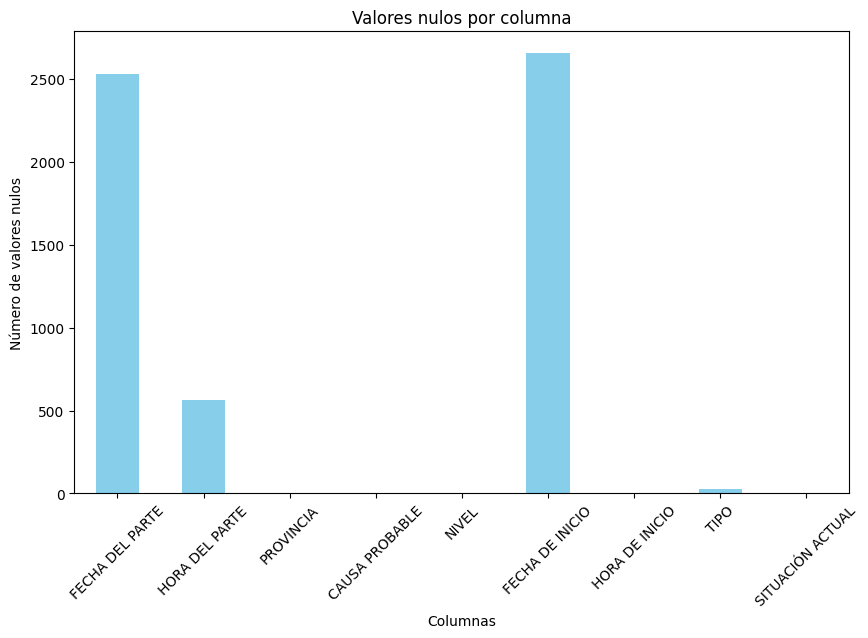

In [45]:
import matplotlib.pyplot as plt

# Contar los valores nulos en cada columna
valores_nulos = df_fin.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según sea necesario
valores_nulos.plot(kind='bar', color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.title('Valores nulos por columna')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [29]:
## Imputar valores con el valor anterior

In [46]:
# Imputar los valores faltantes con el valor anterior
df_fin['FECHA DEL PARTE'] = df_fin['FECHA DEL PARTE'].fillna(method='ffill')
df_fin['HORA DEL PARTE'] = df_fin['HORA DEL PARTE'].fillna(method='ffill')
df_fin['FECHA DE INICIO'] = df_fin['FECHA DE INICIO'].fillna(method='ffill')
df_fin['HORA DE INICIO'] = df_fin['HORA DE INICIO'].fillna(method='ffill')
df_fin['TIPO'] = df_fin['TIPO'].fillna(method='ffill')
df_fin['NIVEL'] = df_fin['NIVEL'].fillna(method='ffill')



/tmp/ipykernel_4888/2632456837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['FECHA DEL PARTE'] = df_fin['FECHA DEL PARTE'].fillna(method='ffill')
/tmp/ipykernel_4888/2632456837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['HORA DEL PARTE'] = df_fin['HORA DEL PARTE'].fillna(method='ffill')
/tmp/ipykernel_4888/2632456837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

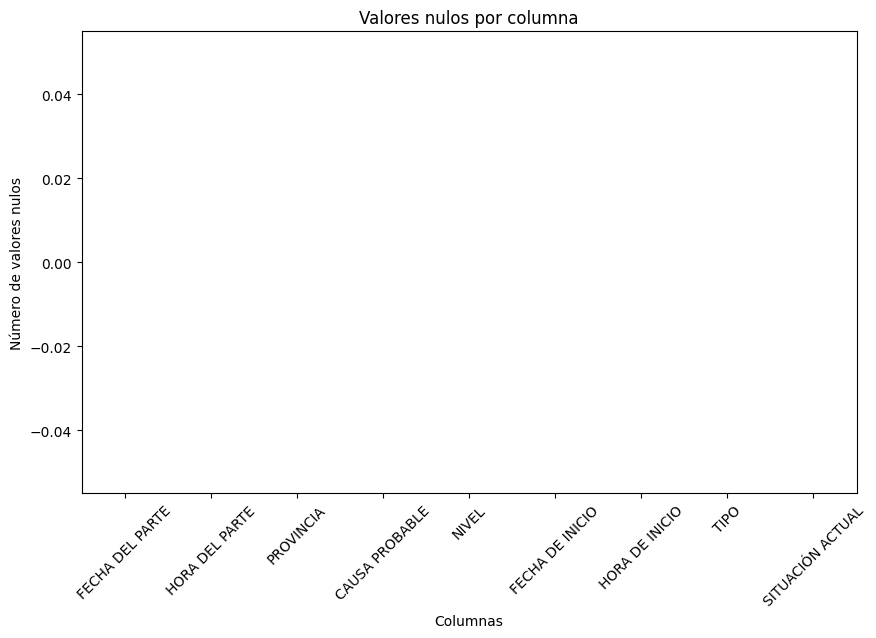

In [47]:
import matplotlib.pyplot as plt

# Contar los valores nulos en cada columna
valores_nulos = df_fin.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según sea necesario
valores_nulos.plot(kind='bar', color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.title('Valores nulos por columna')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [48]:
df_fin.head()

,FECHA DEL PARTE,HORA DEL PARTE,PROVINCIA,CAUSA PROBABLE,NIVEL,FECHA DE INICIO,HORA DE INICIO,TIPO,SITUACIÓN ACTUAL
0,2019-07-01,10:00,BURGOS,RAYOS,0,2019-06-30,20:41,AGRICOLA,EXTINGUIDO
1,2019-07-01,10:00,SALAMANCA,POR DETERMINAR,0,2019-06-29,3:20,FORESTAL,EXTINGUIDO
2,2019-07-01,10:00,SALAMANCA,DESCONOCIDO,0,2019-06-30,17:03,FORESTAL,EXTINGUIDO
3,2019-07-01,19:00,ÁVILA,POR DETERMINAR,0,2019-06-29,16:04,EN PERIMETRACIÓN,ACTIVO
4,2019-07-01,19:00,SORIA,POR DETERMINAR,0,2019-07-01,18:04,AGRICOLA,ACTIVO


In [40]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12714 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FECHA DEL PARTE   12714 non-null  object
 1   HORA DEL PARTE    12714 non-null  object
 2   PROVINCIA         12714 non-null  object
 3   CAUSA PROBABLE    12714 non-null  object
 4   NIVEL             12714 non-null  object
 5   FECHA DE INICIO   12714 non-null  object
 6   HORA DE INICIO    12714 non-null  object
 7   TIPO              12714 non-null  object
 8   SITUACIÓN ACTUAL  12714 non-null  object
dtypes: object(9)
memory usage: 993.3+ KB


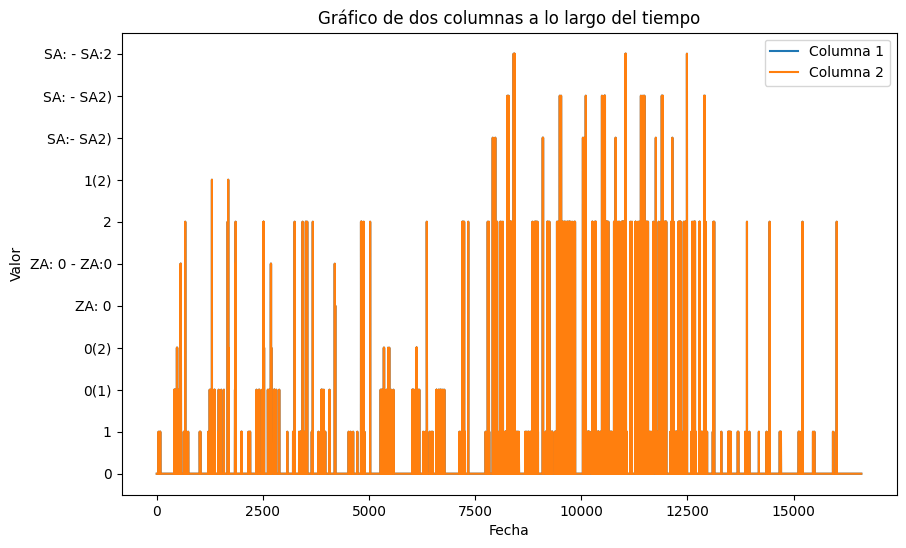

In [50]:
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame tiene una columna 'fecha' como el índice
# y quieres graficar las columnas 'columna1' y 'columna2' a lo largo del tiempo

# Gráfico de líneas de las dos columnas a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_fin.index, df_fin['NIVEL'], label='Columna 1')
plt.plot(df_fin.index, df_fin['NIVEL'], label='Columna 2')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfico de dos columnas a lo largo del tiempo')
plt.legend()
plt.show()


/tmp/ipykernel_4888/1300496561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['NIVEL'] = pd.to_numeric(df_fin['NIVEL'], errors='coerce')
/tmp/ipykernel_4888/1300496561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['diferencia'] = df_fin['NIVEL'] - df_fin['NIVEL']


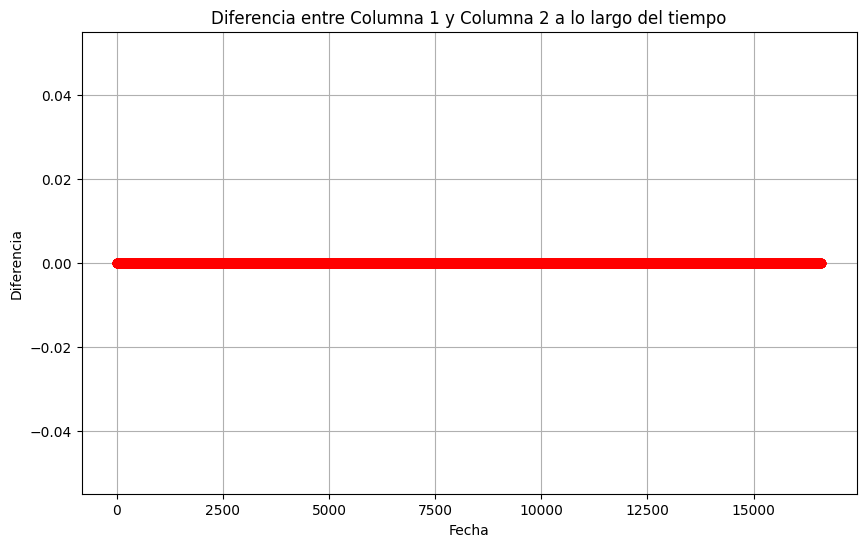

In [54]:
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame tiene una columna 'fecha' como el índice
# y quieres graficar la diferencia entre las columnas 'columna1' y 'columna2' a lo largo del tiempo

# Calcular la diferencia entre las dos columnas
df_fin['NIVEL'] = pd.to_numeric(df_fin['NIVEL'], errors='coerce')
df_fin['diferencia'] = df_fin['NIVEL'] - df_fin['NIVEL']

# Graficar la diferencia a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_fin.index, df_fin['diferencia'], color='red', marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Diferencia')
plt.title('Diferencia entre Columna 1 y Columna 2 a lo largo del tiempo')
plt.grid(True)
plt.show()
